<a href="https://colab.research.google.com/github/yangste333/Seattle-Weather/blob/main/data_analysis/DATA_3320_Seattle_St_Louis_Analysis_Stephen_Yang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

This notebook creates visualizations and graphs to adjust and manipulate Seattle and St. Louis precipitation data to determine whether it rains more or less in either place.

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

## Load clean data

The dataset was originally collected from the NOAA National Centers for Environmental Information (https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND). 

It was cleaned using this notebook: https://colab.research.google.com/drive/1tTT5C1klU7IGHWG1Alp8Y0kgpaIk0ZQb



Loading the clean data set.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/yangste333/Seattle-Weather/main/data_cleaning/clean_seattle_stl_weather.csv')

Quick summary of the dataset and its structure:

In [ ]:
df.head()

,date,city,precipitation,day_of_year,month,year
0,2018-01-01,SEA,0.00,1,1,2018
1,2018-01-02,SEA,0.00,2,1,2018
2,2018-01-03,SEA,0.00,3,1,2018
3,2018-01-04,SEA,0.00,4,1,2018
4,2018-01-05,SEA,0.25,5,1,2018


## State your questions

There's a lot of different measures of "more or less rain". We can examine:

- what is the average amount of rain in each location?
- how many days does it rain for each location?
- when it does rain, how hard does it rain on average for each location?

## Analysis

A good place to start is just a simple summary of each set of precipitation, split by city.

In [ ]:
df.groupby('city').describe()

precipitation                                                  \
             count      mean       std  min  25%   50%   75%   max   
city                                                                 
SEA         1826.0  0.113270  0.240516  0.0  0.0  0.01  0.12  2.60   
STL         1826.0  0.130345  0.392268  0.0  0.0  0.00  0.05  8.64   

     day_of_year              ... month          year                    \
           count        mean  ...   75%   max   count    mean       std   
city                          ...                                         
SEA       1826.0  183.100219  ...  10.0  12.0  1826.0  2020.0  1.414214   
STL       1826.0  183.100219  ...  10.0  12.0  1826.0  2020.0  1.414214   

                                              
         min     25%     50%     75%     max  
city                                          
SEA   2018.0  2019.0  2020.0  2021.0  2022.0  
STL   2018.0  2019.0  2020.0  2021.0  2022.0  

[2 rows x 32 columns]

The mean precipitation for both is very similar - only about 0.02 inches off from each other!

There's definitely more nuance to it, which we can examine later.

First off, we can look at the distribution of rain on days. If one dataset is shifted further right than the other, it gives a good idea of which city might have more rain. Additionally, if there's clear outliers, we should be able to notice them.

We can create a histogram to compare the two distributions. Because there's so many more days where there's no rain compared to having rain, a log scale makes sense so we can see the nuances in the dataset.

The graph below facets two graphs by the city before taking a histogram of the precipitation. There's minor adjustments to make it look better, too, like labels, set scales, and titles.

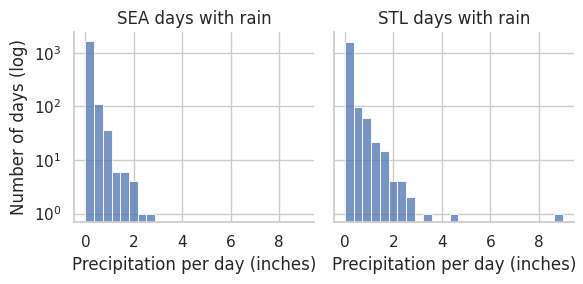

In [ ]:
rainycomp = sns.FacetGrid(df, col = 'city')
rainycomp.map(sns.histplot, 'precipitation', bins = 25, binrange = (0, 9), log_scale = (False, True))
rainycomp.set(ylabel = 'Number of days (log)', xlabel = 'Precipitation per day (inches)')
rainycomp.set_titles(col_template = '{col_name} days with rain')

With the overall dataset, we can see the general distribution of both of the cities is approximately the same. We can also clearly see that there's some severe outliers in the St. Louis dataset (>8 inches of rain on a day), which suggests that if we use the mean, the average might be skewed as a result.

Next, we can examine the number of days that had a significant amount of rain. Most days, as shown in the histogram above, had very little or zero rain.

We can also distribute the number of days by month. In general, the amount of rain per year in a given place should be relatively consistent, but based on global weather patterns, the monthly amount of rain might be different from place to place.

Again, below is a faceted chart. An extra variable is calculated ("rained") to determine if the amount of precipitation is above zero. After that, we take the average of each of them across the months to put into a faceted bar chart.

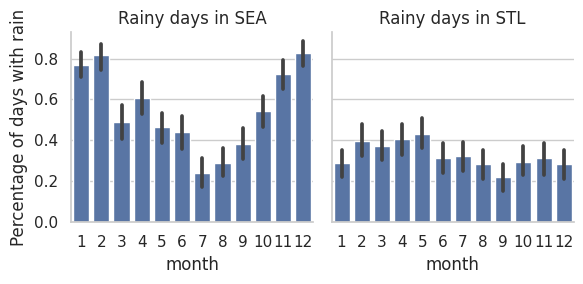

In [ ]:
df['rained'] = (df['precipitation'] > 0)
rainycomp = sns.FacetGrid(df, col = 'city')
rainycomp.map(sns.barplot, 'month', 'rained', order = range(1, 13))
rainycomp.set(ylabel = 'Percentage of days with rain')
rainycomp.set_titles(col_template = 'Rainy days in {col_name}')

Based on this, we can draw a couple of conclusions: 

- Seattle has many more rainy days than St. Louis.
- Seattle also has most of the rainy days in the October-February months. The other times of the year are somewhat close to St. Louis.
- St. Louis generally has a consistent amount of rainy days throughout the year - less than half of all days.


Finally, when it does rain, how hard does it rain? Because there's so many days where it doesn't rain, just looking at the days where it does would make sense.

As we determined with the histogram at the top, using the mean for this would be potentially problematic - we have some serious outliers in the St. Louis dataset - so we will use the median for this analysis instead.

The chart looks at a specific subset of the dataframe - the days where the precipitation is nonzero, which is the "df\[df\['rained'\]]" - and looks at the median value for precipitation for both of those subsets. Again, it's split by month.

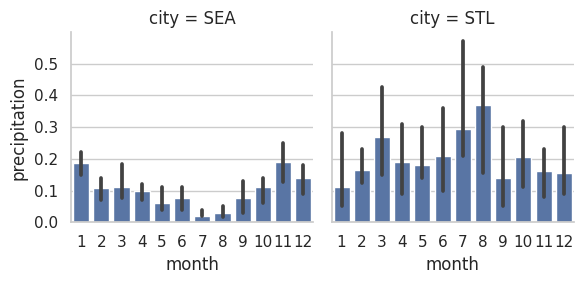

In [ ]:
rainycomp = sns.FacetGrid(df[df['rained']], col = 'city')
rainycomp.map(sns.barplot, 'month', 'precipitation', estimator = 'median', order = range(1,13))

This shows us that, when it does rain in St. Louis, the median precipitation is significantly higher, especially in the summer months.

This would explain why the mean is approximately equal for both datasets. The Seattle dataset has more days with non-zero precipitation, while the St. Louis dataset has much higher precipitation on days with non-zero precipitation.

## Conclusion

Thus, we can say that in different contexts, St. Louis and Seattle are rainer than each other:

- If we're looking specifically at days where it rained, Seattle has more days per year, especially in the fall and winter months, where it rains, so in that context we can say that Seattle is rainier than St. Louis.
- If we're looking at how much it rains when it does rain, St. Louis has significantly more rain when it does rain, so in that context we can also say that St. Louis is rainier than Seattle.

In general, when most people consider a measure of raininess, I think they would consider the first context more important than the second, so we can say that Seattle is, in general, rainier than St. Louis.